In [1]:
from __future__ import print_function
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

C:\Users\RS3\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


0.14099017     10
Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.35848093
For n_clusters = 3 The average silhouette_score is : 0.31336126
For n_clusters = 4 The average silhouette_score is : 0.32760006
For n_clusters = 5 The average silhouette_score is : 0.14941986
For n_clusters = 6 The average silhouette_score is : 0.14612512


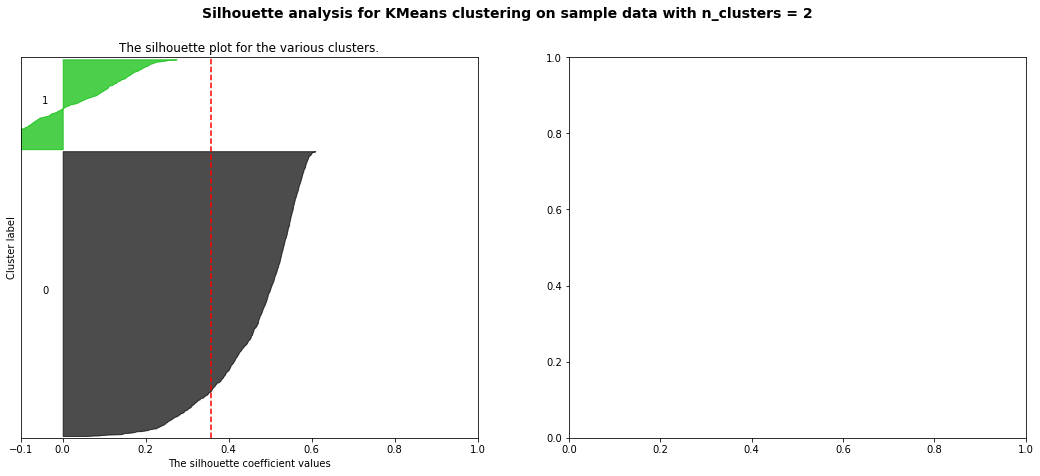

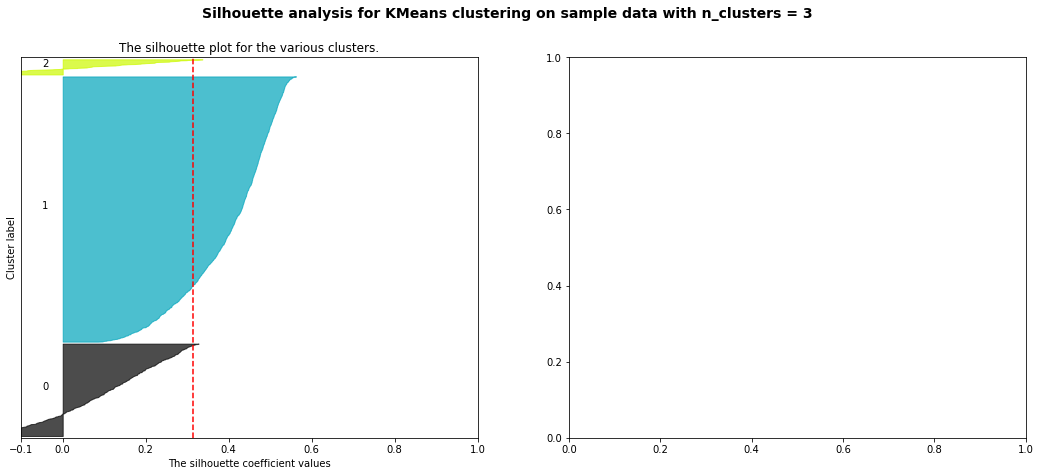

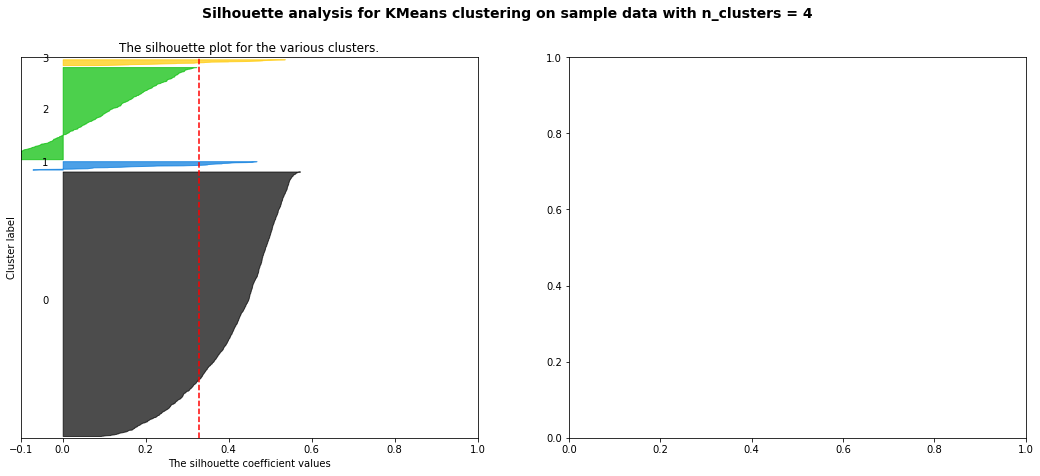

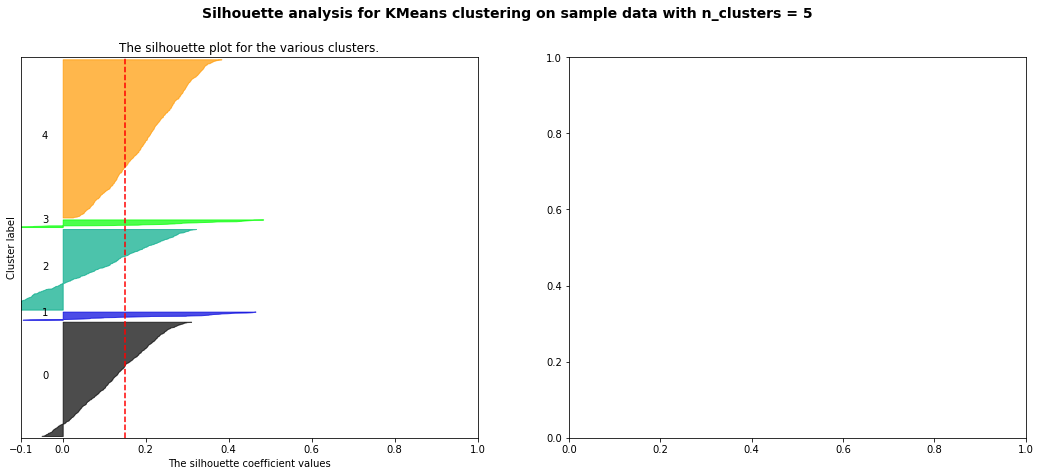

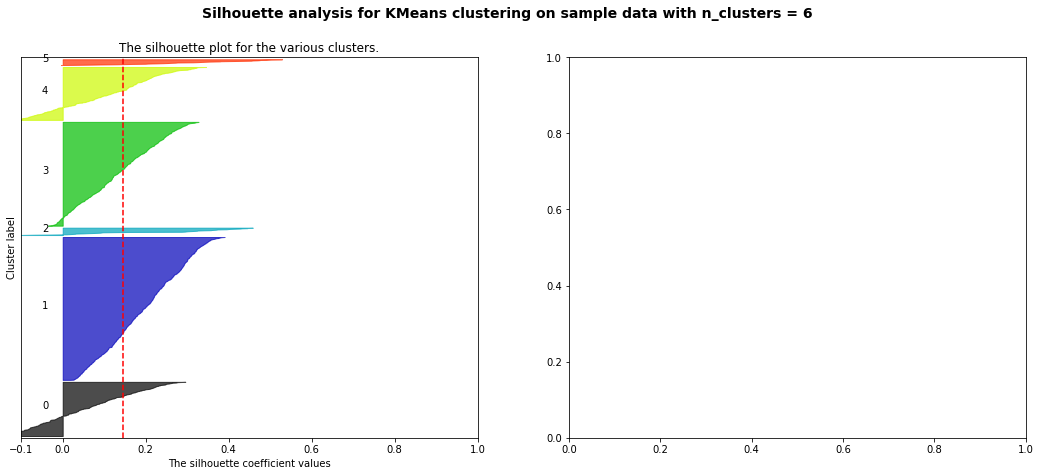

In [2]:
file = open('synopses.txt', 'r', encoding = 'utf-8')
s = file.read()
file.close()

synopses = s.split('\n')

synopses = list(filter(None, synopses))
i = 0
filtered_synopses = []
for synopsis in synopses:
    if(len(synopsis.split('||')) == 2):
        filtered_synopses.append(synopsis)

with open('test123.txt', 'w', encoding='utf-8') as file:
    for item in filtered_synopses:
        file.write(item.split('||')[0].strip())
        file.write('\n')
window = 10
documents = [TaggedDocument(synopsis_name.split('||')[1].strip().split(), [synopsis_name.split('||')[0].strip()]) for synopsis_name in filtered_synopses]
model = Doc2Vec(documents, vector_size = 500, window=window, min_count=5, workers=4, epochs=20)

vectors = []

for i in range(len(filtered_synopses)):
    vectors.append(model.docvecs[filtered_synopses[i].split('||')[0].strip()])


kmeans = KMeans(n_clusters=4, random_state=0).fit(vectors)

m = metrics.silhouette_score(vectors, kmeans.labels_, metric='euclidean')
print(m, '   ', window)



from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

import matplotlib.cm as cm

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    
    ax1.set_ylim([0, len(vectors) + (n_clusters + 1) * 10])


    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(vectors)

    
    silhouette_avg = silhouette_score(vectors, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    
    sample_silhouette_values = silhouette_samples(vectors, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()